In [116]:
# Base Imports
import pandas as pd
import matplotlib.pyplot as plt

#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# NLTK Imports
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import util
from nltk import pos_tag

# Others
import re
import pickle

# Readability
import textstat
# Boxplot
import seaborn as sns

In [306]:
# load in the testing feature_df
feature_df = pd.read_csv('feature_df.csv')

# Fake News vs. Official Communication

## Baseline Classififer

In [307]:
# Select relevant features
feature_df = feature_df[['source','preprocessed','label', 'interestingness', 'sentiment_BERT', 'sentiment_RoBERTa', 'concreteness', 'valence', 'dominance', 'arousal', 'sentiment_vader', 'readability', 'exclamation_marks', 'question_marks', 'digits', 'hashtags', 'lexical_diversity', 'superlatives', 'novelty', 'average_word_length', 'plausibility']]

In [308]:
print(feature_df.isna().sum())
print(len(feature_df))

source                 0
preprocessed           0
label                  0
interestingness        8
sentiment_BERT         0
sentiment_RoBERTa      0
concreteness           0
valence                0
dominance              0
arousal                0
sentiment_vader        0
readability            0
exclamation_marks      3
question_marks         3
digits                 3
hashtags               3
lexical_diversity      0
superlatives           0
novelty                0
average_word_length    0
plausibility           0
dtype: int64
28609


In [309]:
feature_df = feature_df.dropna()
len(feature_df)

28598

In [310]:
# Define feature set and target variable
features = feature_df.columns.drop('label').drop('source').drop('preprocessed')
X = feature_df[features]
y = feature_df['label']

print(X)

       interestingness  sentiment_BERT  sentiment_RoBERTa  concreteness  \
0                  1.0               4                  1      0.652198   
1                  1.0               5                  1      0.642415   
2                  0.0               4                  1      0.647267   
3                  1.0               5                  1      0.646969   
4                  2.0               1                  1      0.644149   
...                ...             ...                ...           ...   
28604              1.0               4                  1      0.635142   
28605              1.0               2                  1      0.642401   
28606              1.0               5                  1      0.631691   
28607              1.0               4                  1      0.661529   
28608              0.0               4                  0      0.625324   

        valence  dominance   arousal  sentiment_vader  readability  \
0      0.606417   0.630947  0

#### Preprocessing (Standardization, Normalization, ...)

In [335]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Fit the encoder and transform y
y = le.fit_transform(y)

In [262]:
from tabulate import tabulate
from sklearn.model_selection import StratifiedKFold, cross_validate


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = 1)


def evaluate_model(X,y, model, cv):
    
    scoring = {'Accuracy': 'accuracy', 
                'Balance Accuracy': "balanced_accuracy", 
                'ROC AUC': 'roc_auc', 
                'PR AUC': 'average_precision'}

    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)

    score_summary = []
    for key, value in scores.items():
        score_summary.append([key[5:], value.mean(), value.std()])

    # Use Tabulate to print a table
    print(tabulate(score_summary[2:], headers=["Metric", "Average", "STD"]), "\n")
    return score_summary

In [263]:
from sklearn.preprocessing import StandardScaler, Normalizer

# Initialize a StandardScaler and fit it to your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize a Normalizer and fit it to your data
normalizer = Normalizer(norm='l2')
X_normalized = normalizer.fit_transform(X)

In [264]:
# Create and fit the model
lsvc = LinearSVC(random_state=42, class_weight='balanced')

evaluate_model(X, y, lsvc, cv)
evaluate_model(X_scaled, y, lsvc, cv)
evaluate_model(X_normalized, y, lsvc, cv)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increas

Metric              Average         STD
----------------  ---------  ----------
Accuracy           0.795043  0.00655168
Balance Accuracy   0.796462  0.00686444
ROC AUC            0.871009  0.003897
PR AUC             0.833817  0.00540548 



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increas

Metric              Average         STD
----------------  ---------  ----------
Accuracy           0.799063  0.00646326
Balance Accuracy   0.799622  0.00668085
ROC AUC            0.87378   0.003467
PR AUC             0.837283  0.00551641 

Metric              Average         STD
----------------  ---------  ----------
Accuracy           0.789834  0.00657968
Balance Accuracy   0.788645  0.0065715
ROC AUC            0.861431  0.00437487
PR AUC             0.828031  0.00560518 



[['ime', 0.06894483566284179, 0.008344649758475152],
 ['_time', 0.004535007476806641, 0.0002833448647660076],
 ['Accuracy', 0.7898343642305576, 0.006579684407639852],
 ['Balance Accuracy', 0.7886446666604322, 0.006571500857501076],
 ['ROC AUC', 0.8614311459471298, 0.004374867042157003],
 ['PR AUC', 0.8280306160690316, 0.005605182419635837]]

In [337]:
# Split the data into training and testing sets (shuffle by default)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True)

### Baseline & Feature Selection

#### SFS Feature Selection

In [175]:
# Sequential backward selection
sbs = SFS(lsvc, 
           k_features=1, 
           forward=False, 
           floating=False, 
           scoring='accuracy',
           cv=5)

sbs = sbs.fit(X_train, y_train)

# Get the final set of features
final_features = list(sbs.k_feature_names_)
print('Final features:', final_features)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increas

Final features: ['sentiment_RoBERTa']


In [176]:
# So what is going on? 
for k in sbs.subsets_:
    print(f'Number of features: {k}')
    print('Selected features:', sbs.subsets_[k]['feature_names'])
    print('CV score:', sbs.subsets_[k]['avg_score'])
    print('-' * 50)


Number of features: 16
Selected features: ('sentiment_BERT', 'sentiment_RoBERTa', 'concreteness', 'valence', 'dominance', 'arousal', 'sentiment_vader', 'readability', 'exclamation_marks', 'question_marks', 'digits', 'hashtags', 'lexical_diversity', 'superlatives', 'novelty', 'average_word_length')
CV score: 0.7967579421889014
--------------------------------------------------
Number of features: 15
Selected features: ('sentiment_BERT', 'sentiment_RoBERTa', 'concreteness', 'valence', 'dominance', 'arousal', 'readability', 'exclamation_marks', 'question_marks', 'digits', 'hashtags', 'lexical_diversity', 'superlatives', 'novelty', 'average_word_length')
CV score: 0.7991611390030116
--------------------------------------------------
Number of features: 14
Selected features: ('sentiment_BERT', 'sentiment_RoBERTa', 'concreteness', 'valence', 'dominance', 'arousal', 'readability', 'exclamation_marks', 'question_marks', 'hashtags', 'lexical_diversity', 'superlatives', 'novelty', 'average_word_

In [324]:
final_features = ['sentiment_BERT', 'sentiment_RoBERTa', 'dominance', 'arousal', 'readability', 'superlatives', 'novelty', 'average_word_length', 'plausibility']

# final_features = ['sentiment_BERT', 'sentiment_RoBERTa', 'dominance', 'arousal', 'readability', 'superlatives', 'novelty', 'average_word_length']


In [325]:
# Fit model with final features and get accuracy
lsvc.fit(X_train[final_features], y_train)
y_pred = lsvc.predict(X_test[final_features])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [326]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

# Calculate and print F1 score
acc = accuracy_score(y_test, y_pred)
print(f'The accuracy score of the Linear SVM model with selected features is: {acc:.4f}')

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(cm)

The accuracy score of the Linear SVM model with selected features is: 0.8538

Confusion Matrix:
[[2758  415]
 [ 421 2126]]


In [ ]:
import numpy as np 

# Find indices where predictions and actual values don't match
mismatched_indices = np.where(y_test != y_pred)[0]

In [226]:
import ast

# Now print some of these instances
num_mismatched_to_display = 10  # You can change this number to what suits you

# This function takes a string representation of list and returns an actual list
def string_to_list(list_string):
    return ast.literal_eval(list_string)

# Now apply this function to every cell in 'preprocessed' column to convert string representation of lists to actual lists
feature_df['preprocessed'] = feature_df['preprocessed'].apply(string_to_list)

for idx in mismatched_indices[:num_mismatched_to_display]:
    original_idx = y_test.index[idx]  # find original index from X_test
    print("Original tweet: ", ' '.join(feature_df.loc[original_idx, 'preprocessed']))  # print original tweet
    print("True class: ", y_test.iloc[idx])  # print true class
    print("Predicted class: ", y_pred[idx])  # print predicted class
    print("-"*50)  # print separator for clarity


Original tweet:  the report shows that in deaths remain unregistered this highlights the urgent need for investments to strengthen health information systems in all countries to support the covid19 response recovery progress towards healthforall
True class:  -1
Predicted class:  1
--------------------------------------------------
Original tweet:  aside from washing your hands frequently use betadine sore throat gargle to eliminate or minimise the germs while they are still in your throat before dripping down to your lungsconfusion
True class:  1
Predicted class:  -1
--------------------------------------------------
Original tweet:  i believe in the vaccine and trust the science and health care professionals im still wearing a mask because i dont want anyone who is at risk for covid or not fully vaccinated to feel uncomfortable around me especially at work
True class:  1
Predicted class:  -1
--------------------------------------------------
Original tweet:  including violence against

/var/folders/px/by1fmlxd5ggfyj8p6_c8m_zh0000gn/T/ipykernel_48892/3917376946.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['preprocessed'] = feature_df['preprocessed'].apply(string_to_list)


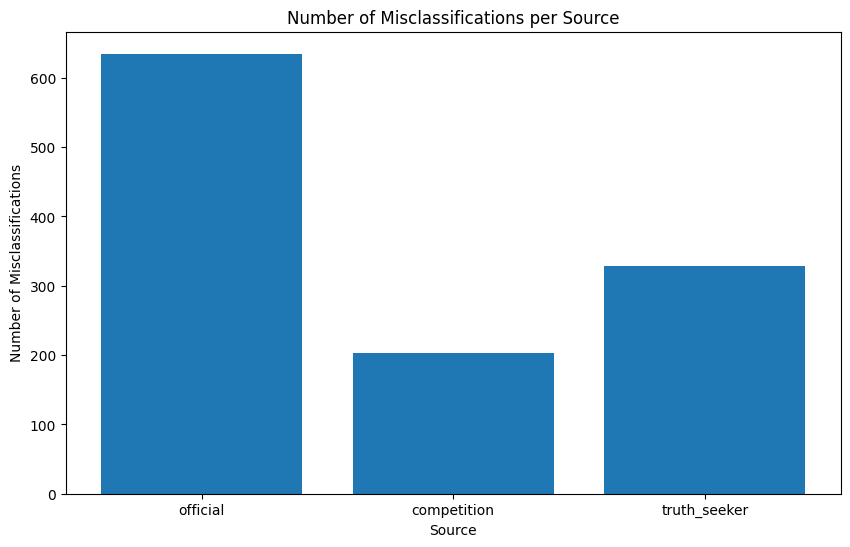

In [221]:
from collections import defaultdict

# Initialize a default dictionary
mismatched_source_counts = defaultdict(int)

# Iterate over mismatched indices
for idx in mismatched_indices:
    original_idx = y_test.index[idx]  # find original index from y_test
    source = feature_df.loc[original_idx, 'source']  # obtain original source
    mismatched_source_counts[source] += 1  # increment the count of this source

# Now let's plot the results
sources = list(mismatched_source_counts.keys())
counts = list(mismatched_source_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(sources, counts)
plt.xlabel('Source')
plt.ylabel('Number of Misclassifications')
plt.title('Number of Misclassifications per Source')
plt.show()

#### Select K Best

SelectKBest is a simple and effective way to perform univariate feature selection in sklearn. It's useful for datasets with many features where you want to reduce the dimensionality by keeping only the most informative features according to a specific criteria

It's important to keep in mind, however, that this method considers each feature individually, 
and so may miss out on important interactions between features.

In [327]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Apply the SelectKBest feature selection
fs = SelectKBest(score_func=f_classif, k=15)
X_selected = fs.fit_transform(X, y)

# Get the scores
scores = fs.scores_

# Get the feature names
feature_names = X.columns

# Create a DataFrame with feature names and their corresponding scores
feature_scores = pd.DataFrame({'Feature': feature_names, 'Score': scores})

# Sort the DataFrame by Score in descending order and reset the index
feature_scores = feature_scores.sort_values('Score', ascending=False).reset_index(drop=True)

# Print the DataFrame
print(feature_scores)


                Feature         Score
0          plausibility  17881.154919
1        sentiment_BERT  10743.958771
2     sentiment_RoBERTa   9874.209741
3               valence   4929.978366
4             dominance   4014.326707
5       sentiment_vader   3772.380269
6               novelty   3054.604432
7               arousal   2743.596436
8   average_word_length    521.701382
9          superlatives    410.126584
10          readability    397.893894
11      interestingness    303.073407
12    lexical_diversity     81.616264
13             hashtags      3.272741
14               digits      0.883027
15         concreteness      0.454960
16    exclamation_marks      0.299366
17       question_marks      0.196501


#### Random Forest Selection

In [328]:
# Tree-baed model

from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [329]:
evaluate_model(X_train, y_train, rf, cv)

Metric              Average         STD
----------------  ---------  ----------
Accuracy           0.902045  0.0046242
Balance Accuracy   0.898422  0.0050689
ROC AUC            0.961711  0.00205968
PR AUC             0.952516  0.00399657 



[['ime', 2.57074556350708, 0.06849520583509426],
 ['_time', 0.12081680297851563, 0.003958047590093284],
 ['Accuracy', 0.9020453494592839, 0.0046242047080308135],
 ['Balance Accuracy', 0.8984218454097481, 0.005068899341027036],
 ['ROC AUC', 0.9617114700090976, 0.0020596845601027762],
 ['PR AUC', 0.9525155591305419, 0.0039965719044276985]]

In [330]:
# Use the fitted model to make predictions on the test data
y_pred = rf.predict(X_test)

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8977272727272727

Confusion Matrix:
 [[2950  223]
 [ 362 2185]]


In [331]:
# Get feature importances
importances = rf.feature_importances_

# Create a list of (feature, importance) tuples
feature_importances = [(feature, importance) for feature, importance in zip(X_train.columns, importances)]

# Sort the feature importances by most important first
feature_importances_sorted = sorted(feature_importances, key = lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importances_sorted:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: plausibility, Importance: 0.2841511196051837
Feature: sentiment_RoBERTa, Importance: 0.1112363349692759
Feature: sentiment_BERT, Importance: 0.09074364967945557
Feature: valence, Importance: 0.07055664736947435
Feature: concreteness, Importance: 0.05867095821317775
Feature: sentiment_vader, Importance: 0.0570593374000934
Feature: dominance, Importance: 0.05585261278119335
Feature: average_word_length, Importance: 0.05010689976446867
Feature: arousal, Importance: 0.04892586109235639
Feature: readability, Importance: 0.03959963025283276
Feature: lexical_diversity, Importance: 0.038465259407803314
Feature: novelty, Importance: 0.03654112888704859
Feature: digits, Importance: 0.019248264013867044
Feature: interestingness, Importance: 0.012478215398751127
Feature: hashtags, Importance: 0.011057704520919854
Feature: superlatives, Importance: 0.007088301863417781
Feature: question_marks, Importance: 0.004647690038196662
Feature: exclamation_marks, Importance: 0.0035703847424838025


In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model
logistic_model = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model
logistic_model.fit(X_train, y_train)

# Predict the classes on the test set
y_pred = logistic_model.predict(X_test)

# Print the accuracy score
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy:  0.8566433566433567


In [ ]:
# # Define your feature set and target variable
# features = ['sentiment_vader', 'readability', 'lexical_diversity', 'superlatives']
# X_real_and_fake = feature_df_real_and_fake[features]
# y_real_and_fake = feature_df_real_and_fake['label']

# print(X_real_and_fake)

In [ ]:
# # Split the data into training and testing sets (shuffle by default)
# X_train_real_and_fake, X_test_real_and_fake, y_train_real_and_fake, y_test_real_and_fake = train_test_split(X_real_and_fake,
#                                                     y_real_and_fake,
#                                                     test_size=0.2,
#                                                     random_state=42)


In [ ]:
# # Create and fit the model
# model_real_and_fake = LinearSVC(random_state=42)

# # Sequential backward selection
# sbs_real_and_fake = SFS(model_real_and_fake, 
#            k_features=1, 
#            forward=False, 
#            floating=False, 
#            scoring='accuracy',
#            cv=5)

# sbs_real_and_fake = sbs_real_and_fake.fit(X_train_real_and_fake, y_train_real_and_fake)

# # Get the final set of features
# final_features = list(sbs.k_feature_names_)
# print('Final features:', final_features)


In [ ]:
# # So what is going on? 
# for k in sbs_real_and_fake.subsets_:
#     print(f'Number of features: {k}')
#     print('Selected features:', sbs_real_and_fake.subsets_[k]['feature_names'])
#     print('CV score:', sbs_real_and_fake.subsets_[k]['avg_score'])
#     print('-' * 50)


In [ ]:
# # Fit model with final features and get accuracy
# model_real_and_fake.fit(X_train_real_and_fake[['sentiment_vader','readability','lexical_diversity']], y_train_real_and_fake)
# y_pred_real_and_fake = model_real_and_fake.predict(X_test_real_and_fake[['sentiment_vader', 'readability', 'lexical_diversity']])

In [ ]:
# # Calculate and print Accuracy
# acc_real_and_fake = accuracy_score(y_test_real_and_fake, y_pred_real_and_fake)
# print(f'The Accuracy score of the Linear SVM model with selected features is: {acc_real_and_fake:.2f}')

# # Print confusion matrix
# cm_real_and_fake = confusion_matrix(y_test_real_and_fake, y_pred_real_and_fake)
# print('Confusion Matrix:')
# print(cm_real_and_fake)

In [ ]:
# Tree model 


## Advanced Models 

#### XGBoost

In [339]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define our XGBClassifier with default hyperparameters
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define our parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  # commonly used values
    'max_depth': [3, 5, 7, 10],  # default is 6
    'min_child_weight': [1, 3, 5],  # default is 1
    'gamma': [0, 0.1, 0.2],  # default is 0
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # default is 1
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]  # default is 1
}

# Initialize GridSearchCV
grid_cv = GridSearchCV(xgb_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_cv.fit(X_train, y_train)

# Print best parameters and results
print(f"Best parameters: {grid_cv.best_params_}")
print(f"Best score: {grid_cv.best_score_}")

# Apply model to test data
y_pred = grid_cv.predict(X_test)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 3240 candidates, totalling 9720 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

# accuracy

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

#### Non-Linear SVM

In [261]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {'C': [0.1, 10, 1000], 
              'gamma': [0.1, 0.001],
              'kernel': ['rbf', 'poly']}

# Create a SVC model
svc = SVC(probability=True, class_weight='balanced')

# Use Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV model
grid_search = GridSearchCV(svc, param_grid, cv=cv, verbose=3, n_jobs=-1, scoring='f1_macro')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best score
best_score = grid_search.best_score_
print(f"Best score: {best_score}")

# Use the best estimator for predictions
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.771 total time= 1.9min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time= 1.9min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.768 total time= 1.9min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.774 total time= 1.9min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.776 total time= 2.0min
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.762 total time= 1.9min
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.756 total time= 1.9min
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.758 total time= 1.9min
[CV 1/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.477 total time= 1.2min
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.756 total time= 1.5min
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.762 total time= 1.6min
[CV 2/5] END ...C=0.1, gamma=0.001, kernel=poly;

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.794 total time= 1.8min
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.804 total time= 1.9min


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

# Calculate and print F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print(f'The F1 score of the Linear SVM model with selected features is: {f1:.2f}')

# Calculate and print precision
precision = precision_score(y_test, y_pred, average='macro')
print(f'The precision of the Linear SVM model with selected features is: {precision:.2f}')

# Calculate and print recall
recall = recall_score(y_test, y_pred, average='macro')
print(f'The recall of the Linear SVM model with selected features is: {recall:.2f}')

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Interestingness

In [292]:
# Define feature set and target variable
features_interest = feature_df.columns.drop('label').drop('source').drop('preprocessed').drop('interestingness')
X_interest = feature_df[features]
y_interest = feature_df['interestingness']

In [293]:
# Split the data into training and testing sets (shuffle by default)
X_train_interest, X_test_interest, y_train_interest, y_test_interest = train_test_split(X_interest,
                                                    y_interest,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True)

In [294]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Apply the SelectKBest feature selection
fs = SelectKBest(score_func=f_classif, k=15)
X_selected = fs.fit_transform(X_interest, y_interest)

# Get the scores
scores = fs.scores_

# Get the feature names
feature_names = X.columns

# Create a DataFrame with feature names and their corresponding scores
feature_scores = pd.DataFrame({'Feature': feature_names, 'Score': scores})

# Sort the DataFrame by Score in descending order and reset the index
feature_scores = feature_scores.sort_values('Score', ascending=False).reset_index(drop=True)

# Print the DataFrame
print(feature_scores)


                Feature        Score
0               novelty  3641.520143
1               arousal   852.334599
2               valence   263.272132
3        sentiment_BERT   228.821515
4       sentiment_vader   218.839614
5     sentiment_RoBERTa   201.435355
6           readability   136.471260
7             dominance   134.057602
8     lexical_diversity    90.956925
9          concreteness    63.893610
10  average_word_length    53.585052
11         superlatives     5.688322
12             hashtags     1.967674
13       question_marks     0.755147
14               digits     0.465532
15    exclamation_marks     0.410517


In [296]:
# Tree-baed model

from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_interest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_interest.fit(X_train_interest, y_train_interest)

RandomForestClassifier(random_state=42)

In [298]:
from sklearn.metrics import classification_report

# Use the fitted model to make predictions on the test data
y_pred_interest = rf_interest.predict(X_test_interest)

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test_interest, y_pred_interest))



Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.15      0.25       373
         1.0       0.78      0.95      0.85      4020
         2.0       0.73      0.39      0.51      1327

    accuracy                           0.77      5720
   macro avg       0.75      0.50      0.54      5720
weighted avg       0.76      0.77      0.74      5720



In [305]:
# Get feature importances
importances = rf_interest.feature_importances_

# Create a list of (feature, importance) tuples
feature_importances = [(feature, importance) for feature, importance in zip(X_train_interest.columns, importances)]

# Sort the feature importances by most important first
feature_importances_sorted = sorted(feature_importances, key = lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importances_sorted:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: novelty, Importance: 0.13389824559886973
Feature: arousal, Importance: 0.10773072057607262
Feature: dominance, Importance: 0.09542727895253815
Feature: concreteness, Importance: 0.09471506281301995
Feature: valence, Importance: 0.09451344377226273
Feature: average_word_length, Importance: 0.08580362835078087
Feature: readability, Importance: 0.08497925852364807
Feature: sentiment_vader, Importance: 0.07653335253446875
Feature: lexical_diversity, Importance: 0.069075985407863
Feature: digits, Importance: 0.05081553165641532
Feature: hashtags, Importance: 0.029631305597506454
Feature: sentiment_BERT, Importance: 0.02528464177368723
Feature: sentiment_RoBERTa, Importance: 0.02183479115270983
Feature: question_marks, Importance: 0.012673275757365819
Feature: exclamation_marks, Importance: 0.008976679388434189
Feature: superlatives, Importance: 0.008106798144357212


In [302]:
lsvc_interest = LinearSVC(random_state=42, class_weight='balanced')

In [303]:
# Fit model with final features and get accuracy
lsvc_interest.fit(X_train_interest, y_train_interest)
y_pred_interest = lsvc.predict(X_test_interest)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [304]:
# Use the fitted model to make predictions on the test data
y_pred_interest = lsvc_interest.predict(X_test_interest)

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test_interest, y_pred_interest))



Classification Report:
               precision    recall  f1-score   support

         0.0       0.42      0.02      0.04       373
         1.0       0.78      0.87      0.82      4020
         2.0       0.56      0.52      0.54      1327

    accuracy                           0.73      5720
   macro avg       0.59      0.47      0.47      5720
weighted avg       0.71      0.73      0.70      5720

